In [1]:
#cell 1
%matplotlib inline
from fastai.basics import *

**You know what? I think I've been taking this whole import thing for granted. I only really thought about this recently, I believe it just takes these separated notebook source codes and allows their classes and functions to be used. This means that you can keep all of your code safe and non-conflicting with other codes that may be pulled into the current notebook kernel. Lets check it out in detail.** 

**Let's look at the first part '%matplotlib inline'. Luckily we can feel comfortable in our ability to understand what this is because the word 'magic' is used to describe it. Easy day! moving on......No. No we're not moving on. That's ridiculous. Let's start with what we know. We know the '%' sign allows us to make sure this option is allowed to happen in the entire notebook. This is a pure python function. I'm guessing they didn't have it for the longest time and thought it was magical when they finally came out with a version that had this function? who knows. In any case, this line of code allows whatever 'matplotlib' generated graph to pop up in an output cell below whatever cell you just executed the code in.** 

**This is nice, I assume otherwise it just stored it as data somewhere on the computer and you'd have to grab it doing some other coding. That satisfies what it is. I don't really know how it is, but we'll leave this one to the python gods.Let's try the second line;**

**The oracle of the web tells me that we have two things going on here. A finder function and an import function. These are 'from' and 'import' respectively. Now, the sources say that 'from' executes a search command for the following parts, in this case it's 'fastai.basics'. But what are these? Well, let me look in the files. Starting with 'fastai' I can assume that it's looking through my miniconda3 (or whatever overarching package you used to install your stuff; conda, ubuntu...ect.) and asking it to look through my 'packages' that I had installed at some point in the 'pkgs' folder. Now it's important to note that these particulars of where and how to look were pre-determined by whatever installation system was used in the first place. In this case, it looks like miniconda3 has a go to search in it's 'pkgs' folder because that's where it keeps all of it's non-original python coding. Okay, in here we have our fastai folder. What's interesting is that the  folder name starts with 'fastai' but also has more characters to it. It makes me wonder if the 'from' search function is just doing key word searches for anything 'fastai' until it finds a folder specifically called 'fastai'. If that's the case we would expect any bare bones folder name with the characters 'fastai' will have something called 'basics'.**

**OMG BECKY! look at what I found in a folder named 'fastai'?!! it's a py file called 'basics'. Interesting, now let's consider that '*' character we have after 'import.' We know that 'import' is a function to tell us what we specifically want to pull out of this 'basics.py' file. What do I mean by that? Well let's look into the file;**

   > `from .basic_train import *
   from .callback import *
   from .core import *
   from .basic_data import *
   from .data_block import *
   from .layers import *
   from .metrics import *
   from .torch_core import *
   from .train import *
   from .datasets import *
   from .version import *
   from . import callbacks
   from . import core,torch_core,basic_data,basic_train,
   callback,data_block,layers,metrics,train,datasets,callbacks`
   
> `__all__  = [o for o in dir(core) if not o.startswith('_')]`

> `__all__ += [o for o in dir(torch_core) if not o.startswith('_')]`
> `__all__ += [*basic_train.__all__, *callback.__all__, 'core', 'torch_core', 'callbacks',
               *basic_data.__all__, *data_block.__all__, *layers.__all__, *metrics.__all__,
               *train.__all__, *datasets.__all__, '__version__']`
               
> `try: from .gen_doc.nbdoc import doc except: pass  # Optional if jupyter is present #__all__.append('doc')
__all__ = [o for o in dir(sys.modules[__name__]) if not o.startswith('_')] + ['__version__']`

**That's a lot more things to connect to a lot more other things. Why would we do that? well, do you really want to type out all of the above again, and again each time you need these things to perform some routine tasks that you will do several times? I'm guessing no. Now, back to that '*' character. In many basics of computer language stuff (especially searching for things) '*' is ubiquitous with 'everything.' so that must mean that we're importing everything that this thing is saying to import. We don't have to keep going into each and every one, but it's nice to know the overarching purposes to these things.**



In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
#cell 2
n=100 #object that holds the integer 100

**Luckily we went over where these class and function names come from in cell 1. Like, what is 'torch.one'? Well, remember that we imported everything from the 'fastai.basics' file? it also contained a 'torch_core' import code. And I bet your bottom dollar that 'torch' is in there...Probably a class that has the function 'ones'...But let's find out to see if I'm right!**

**Okay, crazy enough we had the 'torch_core.py' file in the same folder as the 'fastai' folder that housed our 'basics' file from cell 1. Now, we can do a ctrl-f search for 'torch' but that just highlights 50 'torch' words, none of which we need. So let's guess that the 'torch' we're looking for, resides within one of these further import functions;**
 
> `"Utility functions to help deal with tensors"
from .imports.torch import *
from .core import *
from collections import OrderedDict
from torch.nn.parallel import DistributedDataParallel`

**I'm going to start with the first one and see if we're lucky. But let's take another look as to how this search function is doing its searching. We can see a few of these lines have a '.' in front of them while others have a name.**
**At first glance it appears that everything with a '.' before it says to look for something within the current folder 'fastai' that we pulled all of this from. That's exactly what we have, with the exception that the first word for these ('imports' and 'core' respectively) is seemingly matching the first word it can find in the current folder 'fastai'. Like so;**

**'imports' is a folder. The line of code has another '.' character. Does this mean to look for something in the folder name it described before? Well sure as shit, it did. There is infact a 'torch.py' file in the folder 'imports'.**

**The next line of code '.core' is actually in the current 'fastai' folder. Since we have that figured out, what are the last two lines of import trying to tell us? I'm goign to throw a wild guess out there and suggest that it's just going to do it's generic search starting from the 'pkgs' folder for these items and will have '.' to denote
where it should look next.**

**I found this to be true with the last line 'from torch.nn.parallel import DistributedDataParallel' but I can't seem to find the second to last line. Not to fret, I can just do a search within my folder on my operating system. It looks like the collections folder was hiding in the regular python programming. It just seems that whenever we installed python, it also came with some libraries that python has deemed pretty useful, enough to automatically place in their system.**

**Okay, now back to what we're doing with these codes. Now that we know why, how and where they exist. We can just skip to the searching via the web for these functions.**




In [3]:
#cell 3
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.7838,  1.0000],
        [ 0.3644,  1.0000],
        [ 0.1982,  1.0000],
        [ 0.8863,  1.0000],
        [-0.9423,  1.0000]])

**Okay, now back to what we're doing with these codes. Now that we know why, how and where they exist. We can just skip to the searching via the web for these functions. Starting with 'torch.ones';**

> `torch.ones(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor`

**This is the argument that it takes. So basically what we've done is say we want a tensor with 'n' rows (100 as described in cell 2) and '2' columns. This is true, since I ran 'x' in a cell and that's what it did. Now the next line says 'x[:,0]' what is this?**

**Let's play with it. When we run it now it seems to give the first set of columns a ranging value from -1 to 1. How does it do this? The easy part shows us that 'uniform_(-1.,1)' calculates a random number in line with a floating point between these two values. great, we can see the uniform_ function looks like this;**

> `uniform_(from=0, to=1) → Tensor Fills self tensor with numbers sampled from the continuous uniform distribution`

**So it seems it makes a list of floating point numbers and draws a sample from them. Cool. Now how did it know to do it to the  first column only? Well, it seems the way we entered in x[:,0] stood for ':' being all of the first column and '0' being all of the second column. But this doesn't make complete sense, because I switched them around to 'x[0,:]' and it gave me the first row as random integers!**

**Let's think about this again. Let's assume that the two values in the brackets of x [:,0] still stand for row first, then column. And there was the disconnect. the first part means do this to every row. The second part states the column. so duh, first column is 0 and the next one is 1 and so on and so forth. Typing in 'x[:,1]' proves this by making all second column items random ints instead. whew, moving on.**

In [4]:
#cell 4
a = tensor(3.,2); a #finally an easy one. it just makes an object with one row tensor having two columns. like the one in cell 3

tensor([3., 2.])

In [5]:
#cell 5
y = x@a + torch.rand(n)

**Looks like we might have a thing or two in this one. What's crackin' here? I can tell you that the '@' symbol is a shorthand notation to do a matrix multiplication. What's that you ask? well in this case, it's going to multiply all of those 100 rows of two columns in 'x' from cell 3 by the tensor in cell 4. In other words, every row in 'x' is going to be multiplied by (3.,2.). Example;**

**first x row = (.5235,.2635) this means that each respective column will be multiplied by the column in 'a' and added together so;** 

**(.5235x3 +.2635x2) is equivalent to (1.5705+ 0.527). in this case we just do it for all 100 rows.**

**This code is also creating an object 'y' that takes those matrix multiplication values and adds a randomly generated number to each one. in this case, we are creating 'torch.rand(n)' which makes 100 random values between zero and one. then each of these numbers in the list will be added to the value we received from our matrix multiplication.**

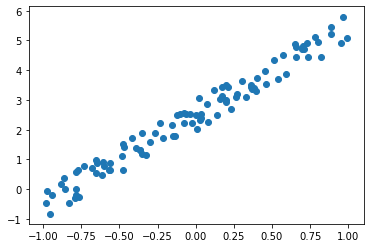

In [6]:
#cell 6
plt.scatter(x[:,0], y);

**Let me clarify this one. We are taking our 'x' value we created in cell 3 and grabbing only the first column out of every row of 100. This is going to be our plot on the x axis in the graph. Then we're going to use the 100 numbers we created in the 'y' object and use those to place on our y axis.**

**Now, we've already gone over the 'plt' function and decided to just understand it's a matplotlib library operation that does all the tedious graph work for us. Thank god. So know we have a good understanding of what just popped up below, to include that magical '%' operator that made sure this popped up below.**

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [7]:
#cell 7
def mse(y_hat, y): return ((y_hat-y)**2).mean()

**We pretty much have a definition of what's going on in the cell above. Essentially we're doing a linear regression problem here. So, we want to find a line that is as close to all data points as it can be simultaneously.**

**In the above cell we have a function that is going to take the mean square error function 'mse' with the parameters of 'y' from cell 5 as you can see graphed above. We're also going to use the 'y_hat' and create that in the cell below. Then we're going to take the summation of all these two values in y, subtract them, square the answer and then take the mean of all of them. Taa daa, that's a mean squared error.**

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [8]:
#cell 8
a = tensor(-1.,1) #just making a simple tensor with two columns here

In [9]:
#cell 9 
y_hat = x@a
mse(y_hat, y)

tensor(6.6163)

**Here we're just making up another tensor of predictions that we know will be slightly off balance from the tensor we created in cell 3. I know they're both technically made up, but we're just doing this to illustrate how gradient decent works. The next line of code is just utilizing our function we made in cell 7.**

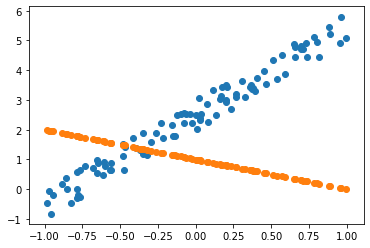

In [10]:
#cell 10
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

**This is just a simple plot of what we had created before in the first line, and now we've also plotted the 'y_hat' object we created in cell 9. which is our old matrix creation 'x' multiplied by a new 'a' object tensor. Why are we doing this?**

**Well with 'y_hat' we really just made a straight line that has the same 'x' values for both but altered the 'y' value so it puts everything in line. This is our visual to see how we can linearly regress towards a line that tries to fit all points to a equilibrium sweet spot.**

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [11]:
#cell 11
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

**I see 'a' is a popular object annotation. But anyway, let's see what we're making. It looks like 'nn.Parameter' is a class that is called a 'module parameter'. I don't know what that means, and the source document doesn't explain it very well either. It says something to the effect of when used with 'Module' class it helps creat a list of parameters that will be used in some future iteration process. I'm sure it's super fancy, since it's so hard to comprehend.** 

**In any case, it does return a parameter containing a tensor similar to the other 'a' object we created in cell 8 excet it also has another kwarg called 'requires_grad=TRUE' This says that it's a subgradient...I don't know what that means either. Let's consult the oracle(google);**

**It apparently falls under 'autograd mechanics.' It says this function allows for the exclusions of sub-graphs from gradient computation. I assume this means that we can do things faster without having to worry about recording some sort of output through various points of the calculations. I assume this is done in normal situations and that data allows for plotting to show what is was doing at some point later in life. So here we are. collecting these datapoints. Let's see where we go with this.**

In [12]:
#cell 12
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()


**Here we are making another function called 'update.' So we have some items that we have made in cell 9 for 'y_hat' then we are making an object called 'loss' which is the mean squared error that we explained in cell 9.**

**The next line is giving us an 'if' statement. This '%' means to divide by 10 and if it has a remainder of zero it's going to print the 'loss' object, which is our mean squared error. What is 't'? it's actually in the next line of code, it's a iteration that stands for a value count in 1 trough 100. So every 10 counts we're going to print our mean squared error. NEXT!**

**We seem to be taking our mse and applying a function called 'backward' to it. I had to google this to find it in pytorch documents and I'm not sure if it's the right one? It's kind of a pain because the in python document search won't pop up. grrrr. I have to wager a guess that this is from the autograd section of pytorch. ....I have no clue what this is doing. I guess it's time to read....stand by....**

**Okay, the document is in pytorch. I found an autograd tutorial. It tells me that if any tensor has an arugment that has the 'requires_grad=True' then the computation will be tracked. That supports what we learned in cell 11. So when it's tracking these computations it says; 'After computing the backward pass, a gradient w.r.t. this tensor is accumulated into .grad attribute.'**

**We're on the right track because we run into a 'loss.backward()' line in the code followed by some mentions of 'grad.' But what is a w.r.t? I have no damn clue. Apparently nobody likes speaking or writing the english language, maybe everyone should stop being lazy asshats and type shit out instead of pretending they're smart for saying letters. Dick heads. I swearto god, if it really means 'with respect to' I will beat somebody's ass.
Anyway. lets assume the gradient is stored in the.grad part.**

**The next paragraph tells us that we can compute the derivatives by using '.backwards()' on a tensor. So we do have a tensor in the 'loss' object with rank 1 (6.5641). Which is a good sign because we call the function 'backwards' and it looks like this;**

> `def backward(tensors, grad_tensors=None, retain_graph=None, create_graph=False, grad_variables=None):`

**The pytorch documents let us know that since this is a scalar Tensor (has 1 element) we don't need to specify any arguments to it. It also says that this will compute the some of gradients of the given tensors to a graph leave. I don't know what a graph leave is. I assume a part of the data that is used in a particular instance of the graph? anyway, it says it will take the graph and differentiate it using the chain rule. Since this function will be ran 100 times (look in next cell) we can assume that once for every iteration, this function is executed. It will take the derivative of the 'mse'. The thing is, I'm not sure where these values will change or else we'd just have the same exact derivative using the same values to calculate. Let's look at the next few lines to see where this change takes place;**

  > `with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()`

**Let's check on this 'torch.no_grad' class....it says it turns off our gradient tracker that we turned on when we called the 'backward' function. So, maybe this is where we are manipulating the datum that we don't want to track? sure, why not?**

**So, here we're taking our tensor object 'a' that we made from cell 11 and applying some sort of inline computation from 'sub_' I assume this is subtract? I hope any way. I see that we're incorporating a learning rate in there also, which is set in the next cell. YAYYY now we found out how our tensor is actually changing! we are subtracting the learning rate * the derivative value stored in the 'a.grad' portion.**

**Thinking more thoughtfully about the 'grad' part of these tensors, it seems to store only one value. We can see that's the case because we have to zero this out so our next run of the function in this cell can calculate the new derivative to store in the '.grad' portion of our object 'a' tensor. And, this number changes each time by being subjtracted and placed back into the matrix multiplication on the next run of the function. Which is then formulated to the mean squared error and so on and so on until we reach 100 times.....Jesus Christ. That was a lot of looking for a little bit of code.**

In [13]:
#cell 13
lr = 1e-1
for t in range(100): update()

tensor(6.6163, grad_fn=<MeanBackward0>)
tensor(1.5226, grad_fn=<MeanBackward0>)
tensor(0.5016, grad_fn=<MeanBackward0>)
tensor(0.2103, grad_fn=<MeanBackward0>)
tensor(0.1258, grad_fn=<MeanBackward0>)
tensor(0.1013, grad_fn=<MeanBackward0>)
tensor(0.0942, grad_fn=<MeanBackward0>)
tensor(0.0921, grad_fn=<MeanBackward0>)
tensor(0.0915, grad_fn=<MeanBackward0>)
tensor(0.0913, grad_fn=<MeanBackward0>)


**I've referred to this in the previous cell because we had to look ahead here and see where we're going.**

In [18]:
hat = x@a
hat # I had to work around an error on the next cell.

tensor([ 4.8174e+00,  3.5844e+00,  3.0956e+00,  5.1188e+00, -2.5833e-01,
        -1.9168e-02,  1.4772e+00,  4.4418e+00,  1.8303e+00,  8.3889e-01,
         7.5332e-01,  4.1915e+00,  1.4444e+00,  2.2813e+00,  1.1054e+00,
         1.7343e+00,  4.6864e+00,  1.8833e+00,  5.3161e+00,  1.6353e+00,
         3.8733e+00,  2.7524e+00,  4.1053e+00,  2.6009e+00, -3.4272e-01,
         3.3018e+00,  2.1011e-01,  1.5551e+00,  2.4385e+00,  4.5710e+00,
         4.4191e+00,  2.2890e+00, -3.8030e-01,  3.5769e+00,  1.9693e-01,
         4.6529e+00,  2.6800e-01,  3.0250e+00,  2.5353e+00,  5.4315e+00,
         2.3234e+00,  1.0941e+00,  1.4790e+00,  3.6203e-01,  5.1118e-01,
         2.5397e-01,  4.5984e+00,  2.1608e-01,  5.1174e+00,  2.9149e+00,
         3.2024e+00, -2.9544e-01,  3.6723e+00,  5.3447e+00,  1.3588e+00,
         7.0067e-01,  5.8544e-01,  3.7026e+00,  2.5268e+00,  4.8662e+00,
         5.9149e-01,  4.5651e+00,  1.4366e+00,  4.9209e+00,  2.7318e+00,
         2.0489e+00, -3.0622e-03,  7.4935e-02,  2.2

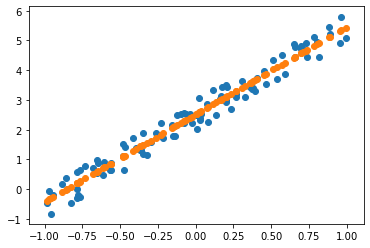

In [20]:
#cell 14, this is supposed to show how the gradient fits the data. It won't work for some reason.
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], hat.detach().numpy());

## Animate it!

In [21]:
#cell 15 
from matplotlib import animation, rc
rc('animation', html='jshtml')

**Even though we can't run these next few cells, it doesn't mean we cant see what they do. So, what are we importing here? It is matplotlibs 'animation' and 'rc'. Let's check their docs on the matplotlib site.
'animation' is an animation class that houses functions to create an animation object, calling a function to make changes to that object or have it do things with other objects. got it.'rc' lucky for us, the definition refers to itself as a definition. Brilliant. Thanks for nothing. But from the arguments taken it seems to refer to lines in our graphs such as width, color, shape...etc..**

In [32]:
#cell 16, this also wouldn't run at first for the same reason in cell 14. I didn't know what the problem was,
# but I added .detach().numpy() to the y variable. of which i had to recalculate in the animate function.
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], hat.detach().numpy())
plt.close()

def animate(i):
    update()
    newHat = x@a
    line.set_ydata(newHat.detach().numpy())
    return line,_

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=50)


**I think we're going to see here that animations aren't that complex. In the first line we're making an object that is a tensor of 1's like we did before.**

**Next were making an object called 'fig' as a 'plt.figure()' which is a default argument to create a graph figure with defaults such as; increments on the lines, size of the figure, resolution and various color schemes.
next we're making a 'plt.scatter' using the first column of 'x', as the x axis and our 'y' object from cell 5 maybe? and then an argument to make that color orange. At first glance, I'm not sure what it's going to do with this, theres no object but maybe the function returns something that's going to be used in the next line of code. Looks like it;**

> `def scatter(
        x, y, s=None, c=None, marker=None, cmap=None, norm=None,
        vmin=None, vmax=None, alpha=None, linewidths=None, verts=None,
        edgecolors=None, *, plotnonfinite=False, data=None, **kwargs):
    __ret = gca().scatter(
        x, y, s=s, c=c, marker=marker, cmap=cmap, norm=norm,
        vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths,
        verts=verts, edgecolors=edgecolors,
        plotnonfinite=plotnonfinite, **({"data": data} if data is not
        None else {}), **kwargs)
    sci(__ret)
    return __ret`
    
**I'm not sure where this return value is being used though. Clearly it's being called in the plt.plot function somehow. I personally don't see it;**

> `def plot(*args, scalex=True, scaley=True, data=None, **kwargs):
    return gca().plot(
        *args, scalex=scalex, scaley=scaley, **({"data": data} if data
        is not None else {}), **kwargs)`
        
**It could be hidden away in in whatever 'gca()' is, but it's hard to tell. The 'gca' code says it takes **kwarg arguments so it seems to add the scatterplot arguments to this 'gca' list and merging it with the 'plot' gca list.
Next we call a close function. I assume this just deletes all of the data we used to generate this graph and allow it to be updated and renewed at intervals, just like the function we made to do 100 calculations of finding the gradient in cell 12. This is confirmed by the next few lines of code that create a function using that same 'update' function in cell 12 within it.**

**We can see this happening, because our 'scatter' plot infers where to get this plotting infomration it can then reset this info after every itterations with the code 'line.set_ydata' function. This just resets the changing line variables from the 'update' function and allows it to create the graph in our 'line' object created in the code above this function. So we're just seeing an animation occur over and over again like a moving picture. The last line of code confirms this;**

> `animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)`

**Here we're feeding it the 'fig' data, telling it to use our 'animate' function at every 20 intervals. So, esentially 5 times per hundred. And done.**

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.